In [2]:
import tensorflow as tf
import pandas as pd
datadir = 'dataset_fog_release\dataset'
import os
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
files = os.listdir(datadir)
name = f"{datadir}\{files[0]}"
column_names = ['ms','ankle_horiz_fw','ankle_vert', 'ankle_horiz_lat','thigh_horiz_fw','thigh_vert', 'thigh_horiz_lat','trunk_horiz_fw','trunk_vert', 'trunk_horiz_lat','annotation']
df = pd.read_csv(name,sep=' ', names = column_names)
df.head

<bound method NDFrame.head of              ms  ankle_horiz_fw  ankle_vert  ankle_horiz_lat  thigh_horiz_fw  \
0            15              70          39             -970               0   
1            31              70          39             -970               0   
2            46              60          49             -960               0   
3            62              60          49             -960               0   
4            78              50          39             -960               0   
...         ...             ...         ...              ...             ...   
151982  2374734              80          39             -960               9   
151983  2374750              60          39             -950              -9   
151984  2374765              60          39             -950             -18   
151985  2374781              60          29             -950               9   
151986  2374796              70          49             -970               0   

        t

In [5]:
def extract_experiment_windows(annotations):
    '''Extracts the indices where an active experiment occurs for slicing time series into valid chunks
    annotations : [int]
        an array of annotations where 0 is inactive, 1 is active experiment, and 2 is gait freeze. Interested in the slices
        of this array that are not equal to 0
    '''
    start = None
    stop = None
    windows = []
    for i in range(len(annotations)):
        if annotations[i] != 0 and not start:
            start = i
        if annotations[i] == 0 and start:
            end = i - 1
            windows.append((start,end))
            start = None
            end = None
    print(windows)
    return windows
extract_experiment_windows(df['annotation'])


[(47999, 67199), (70399, 143999)]


[(47999, 67199), (70399, 143999)]

In [17]:
import numpy as np
import time


def create_sliding_windows(subj_data_frame, window_size = 1000, columns=['ankle_vert','annotation']):
    '''given a subject's dataframe, this will use extract_experiment_windows to find the time intervals where there is 
    an active experiment, and then return a numpy array of "sliding windows".
    By default, the only 
    i.e. 
    if I have a time series [1,2,3,4,5,6], and a window size of 3, this function returns ([[1],[2],[3]], [4]), ([[2],[3],[4]],[5]), etc. 
    '''
    experiment_intervals = extract_experiment_windows(subj_data_frame)
    df_as_np = subj_data_frame.to_numpy()

window_size = 1000
columns=['ankle_vert','annotation']
experiment_intervals = extract_experiment_windows(df['annotation'])
numpy_df = df[columns].to_numpy()
numpy_df_intervals = []
X = []
y = []
start = time.time()
for interval in experiment_intervals:
    numpy_df_intervals.append(numpy_df[interval[0]:interval[1]])
for experiment in numpy_df_intervals:
    print(len(experiment))
    for i in range(len(experiment) - window_size):
        row = [[a] for a in experiment[i:i+window_size]]
        X.append(row)
        label = experiment[i+window_size]
        y.append(label)
end = time.time()
print(end-start)
print(np.array(X)[0])

[(47999, 67199), (70399, 143999)]
19200
73600
352.83517837524414
[[[ 990    1]]

 [[1000    1]]

 [[ 990    1]]

 ...

 [[ 970    1]]

 [[ 960    1]]

 [[1000    1]]]


[(47999, 67199), (70399, 143999)]


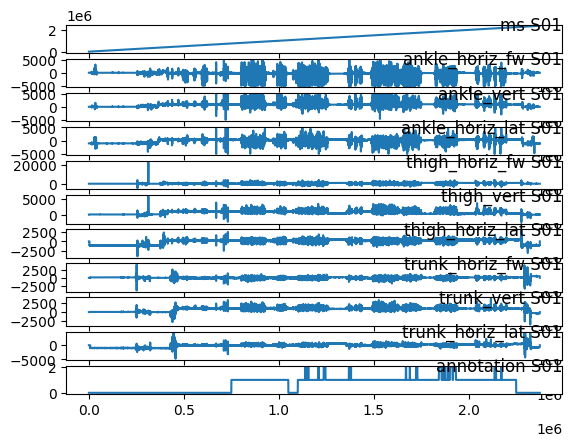

[(15999, 44799)]


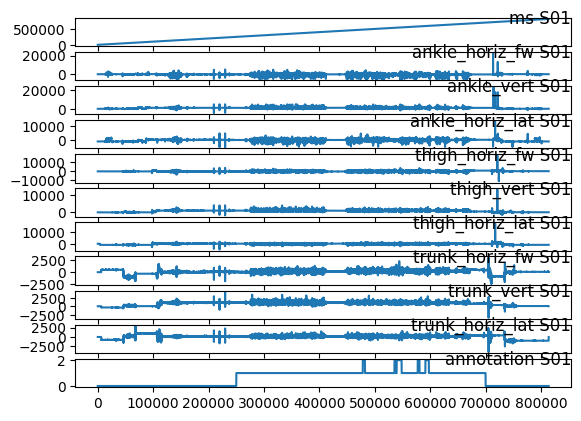

[(42879, 68479)]


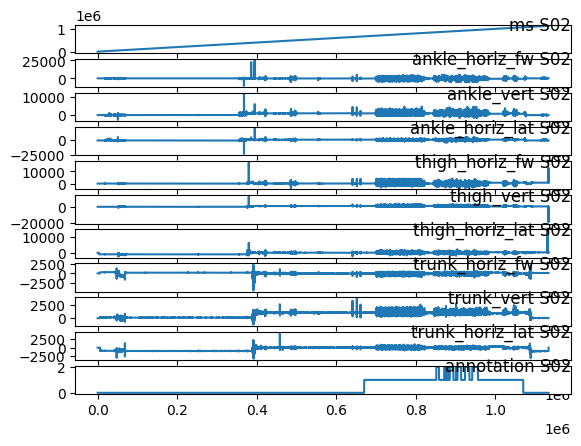

[(11839, 76799)]


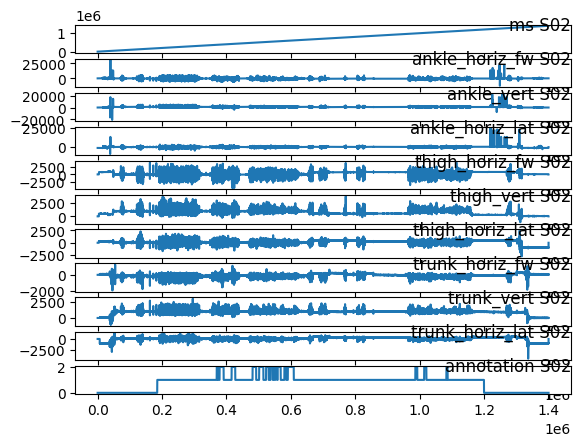

[(42879, 97919), (103679, 139519)]


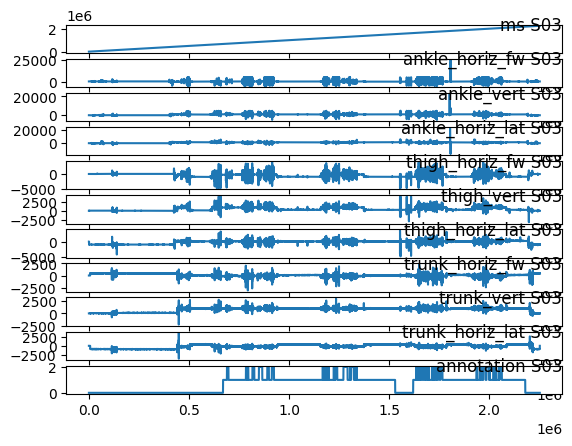

[(16639, 33279)]


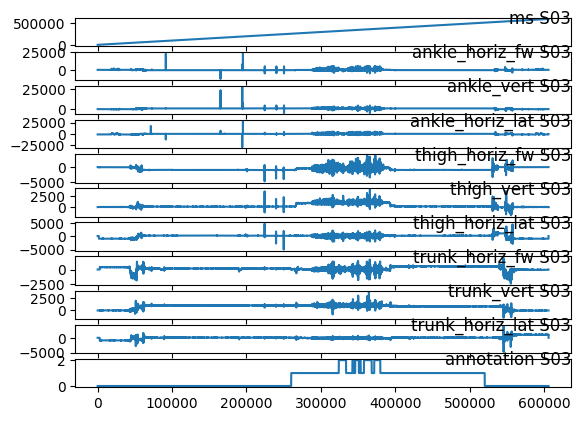

[(41599, 62719)]


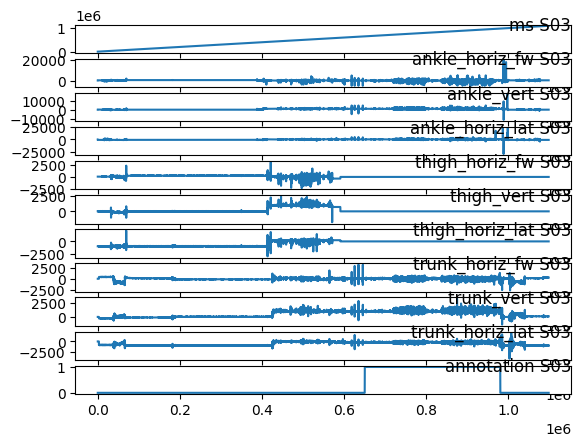

[(47359, 147199), (154879, 187519)]


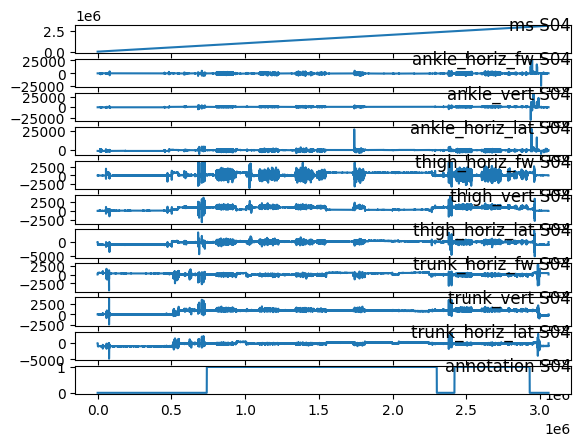

[(28159, 47999), (51199, 75519), (78719, 92799), (95999, 105599)]


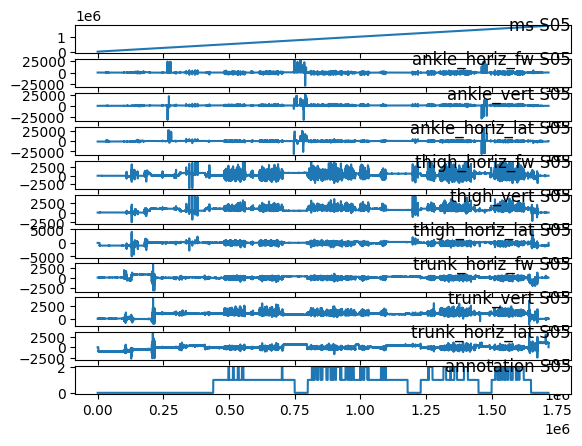

[(21759, 57599), (63999, 94079)]


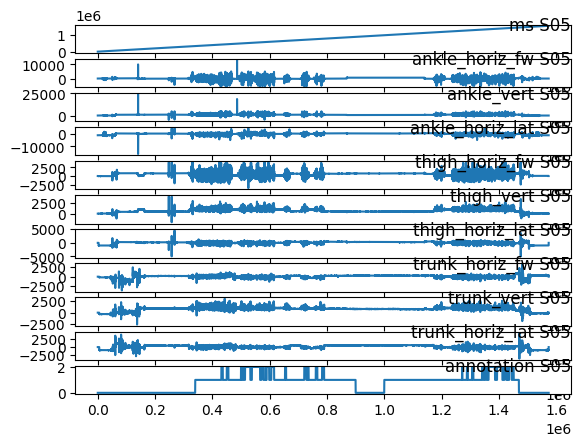

[(31999, 83199), (94079, 124799), (127999, 153599)]


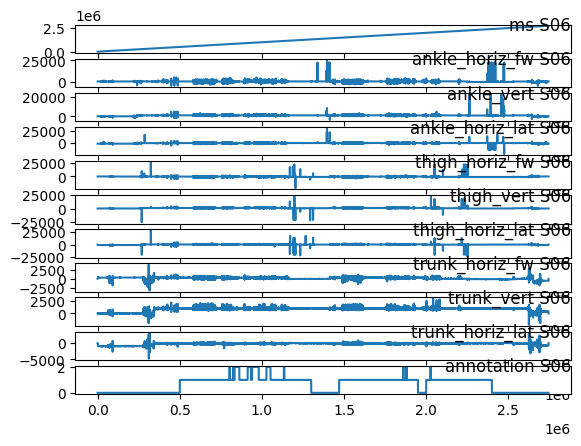

[(17919, 24959), (25599, 38399)]


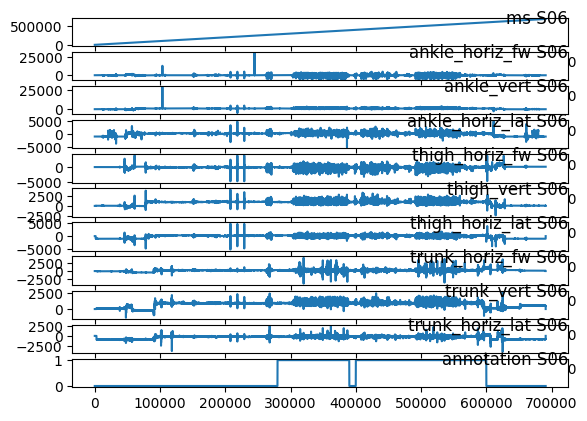

[(38399, 112639)]


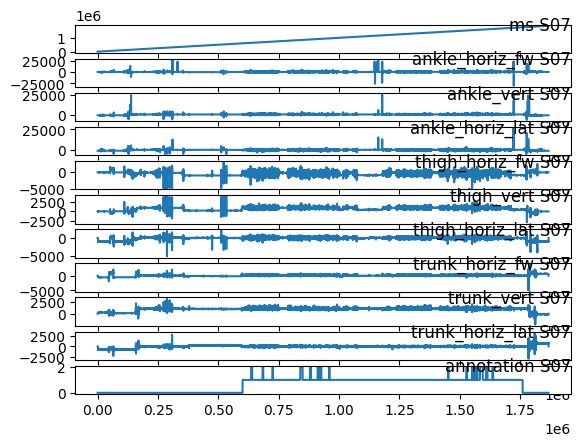

[(15999, 44799)]


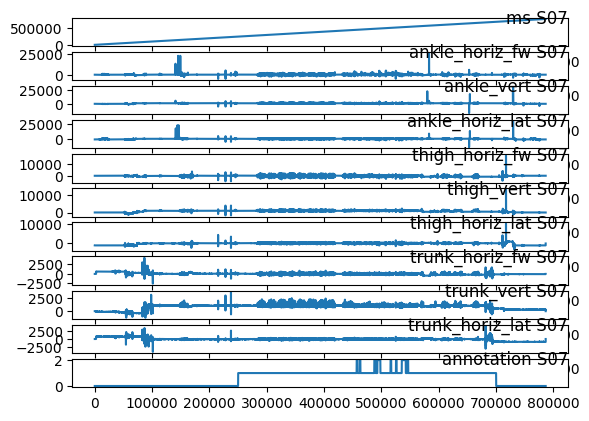

[(39679, 54399), (63359, 73599), (81919, 95359), (111999, 122879)]


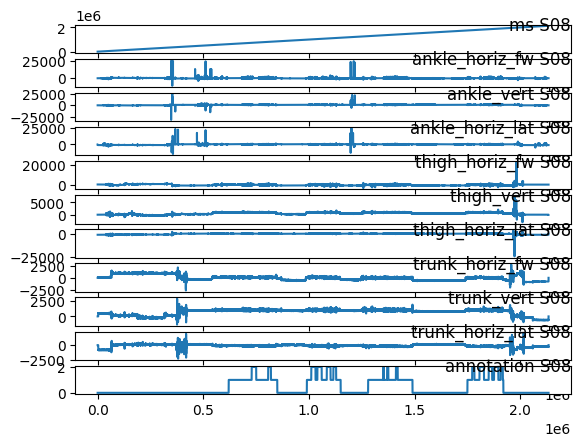

[(26879, 36479), (37119, 47999), (51199, 86399), (102399, 148479), (153599, 163199)]


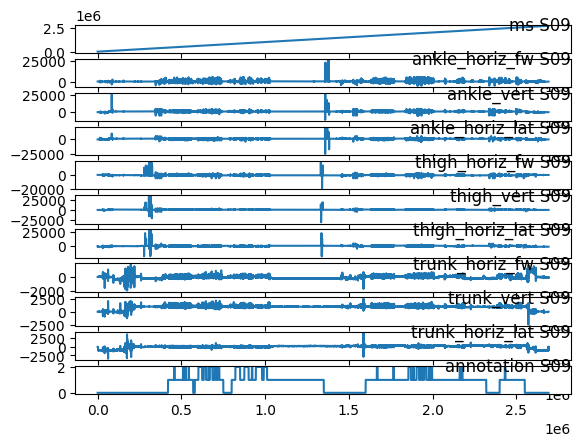

[(38399, 89599), (94079, 185599)]


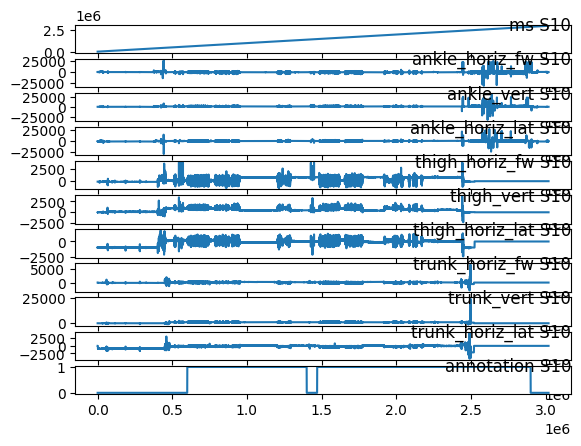

In [4]:

subject_files = [['S01R01.txt','S01R02.txt'],['S02R01.txt','S02R02.txt'],['S03R01.txt','S03R02.txt','S03R03.txt'],
                 ['S04R01.txt'],['S05R01.txt','S05R02.txt'],['S06R01.txt','S06R02.txt'],['S07R01.txt','S07R02.txt'],
                 ['S08R01.txt'],['S09R01.txt'],['S10R01.txt']]
import matplotlib.pyplot as plt
for file in files:

    name=f"{datadir}\{file}"
    df = pd.read_csv(name,sep=' ', names = column_names)
    windows = extract_experiment_windows(df['annotation'])
    plt.figure()
    i = 1
    for column in column_names:
        plt.subplot(len(column_names), 1, i)
        plt.plot(df['ms'], df[column])
        plt.title(column+ " " + file[0:3], y=0.5, loc='right')
        i += 1
    plt.show()
    # plt.plot(df['ms'],df['thigh_horiz_fw'])
    # plt.show()

In [16]:
df.shape


(193303, 11)

In [17]:
df.columns

Index(['ms', 'ankle_horiz_fw', 'ankle_vert', 'ankle_horiz_lat',
       'thigh_horiz_fw', 'thigh_vert', 'thigh_horiz_lat', 'trunk_horiz_fw',
       'trunk_vert', 'trunk_horiz_lat', 'annotation'],
      dtype='object')

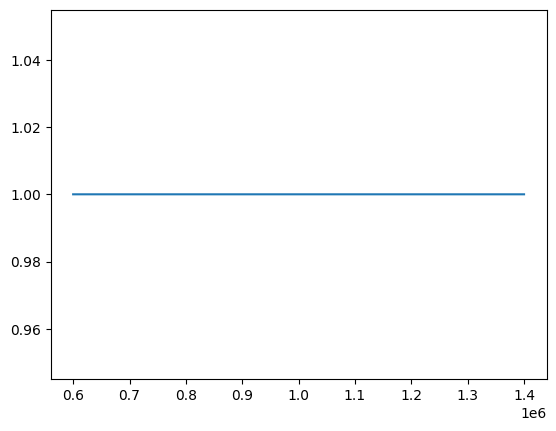

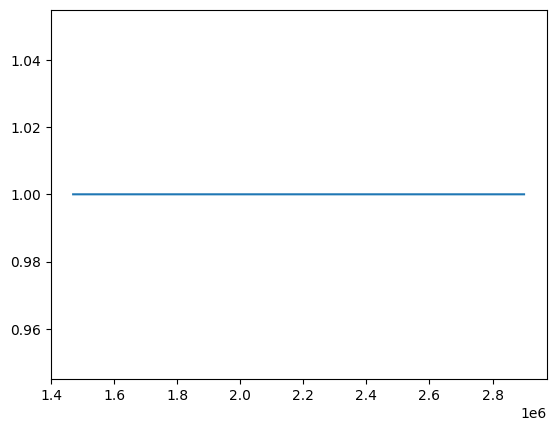

In [20]:
for start,end in windows:
    plt.plot(df['ms'][start:end], df['annotation'][start:end])
    plt.show()